## Lead concentrations in bones, brain, blood and ROB

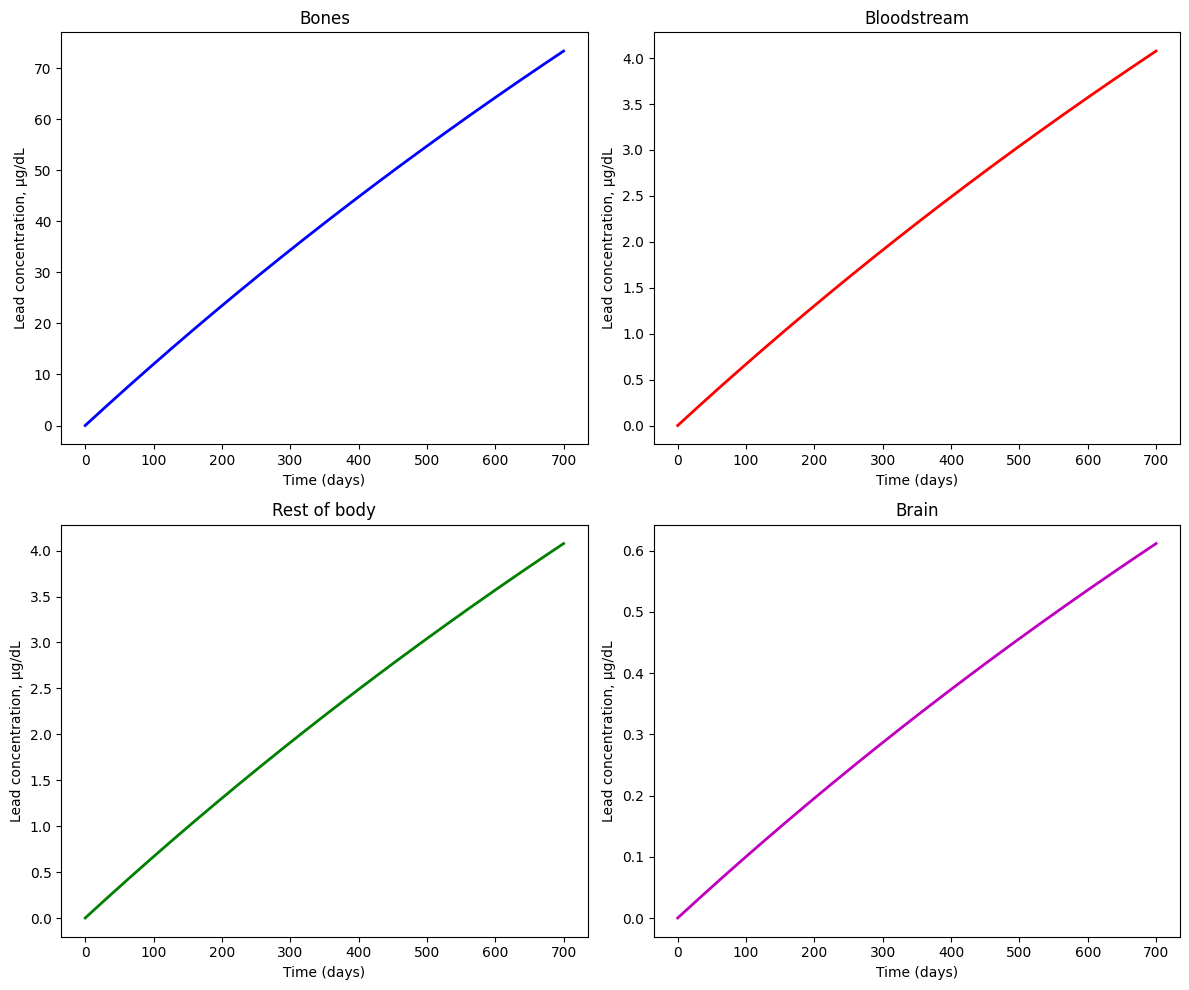

In [38]:
#new excretion rate
#change rate to 0.01*np.exp(-0.02*(y[3]/50)) (BLL/50)
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def model(y, t, M1):
    M2 = 0.6*(1-(y[3]/50)/1300)*M1
    M3 = M1 - M2
    M4 = 0.01*np.exp(-0.02*(y[3]/50))*(M2+y[3]) # change rate to 0.01*np.exp(-0.02*(y[3]/50)) (BLL/50)
    M6 = 0.90*(M2 - M4)
    M5 = 0.05*(M2 - M4)
    M7 = 0.05*(M2 - M4)
    M8 = 0.15*M5

    dydt = [M2, M3, M4, M5, M6, M7, M8]
    return dydt

# Initial conditions
M1 = 11.53  # intake of lead (in ug/day)
M20, M30, M40, M50, M60, M70, M80 = 0, 0, 0, 0, 0, 0, 0
y0 = [M20, M30, M40, M50, M60, M70, M80]

# Time conditions
t = np.linspace(0, 700, 700)  # Define the time points for integration

# Solving the ODEs
y = odeint(model, y0, t, args = (M1, ))

# Plotting results
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].plot(t, y[:, 4]/50, 'b-', linewidth=2, label='Lead Levels')
axs[0, 0].set_title('Bones')
axs[0, 0].set_xlabel('Time (days)')
axs[0, 0].set_ylabel('Lead concentration, μg/dL')

axs[0, 1].plot(t, y[:, 3]/50, 'r-', linewidth=2)
axs[0, 1].set_title('Bloodstream')
axs[0, 1].set_xlabel('Time (days)')
axs[0, 1].set_ylabel('Lead concentration, μg/dL')

axs[1, 0].plot(t, y[:, -2]/50, 'g-', linewidth=2)
axs[1, 0].set_title('Rest of body')
axs[1, 0].set_xlabel('Time (days)')
axs[1, 0].set_ylabel('Lead concentration, μg/dL')

axs[1, 1].plot(t, y[:, -1]/50, 'm-', linewidth=2)
axs[1, 1].set_title('Brain')
axs[1, 1].set_xlabel('Time (days)')
axs[1, 1].set_ylabel('Lead concentration, μg/dL')
plt.savefig('lead_model_figure.png')


plt.tight_layout()
plt.show()

end_state = y[699]
W_final = end_state[3]/50


## Calcium concentration in brain, bones

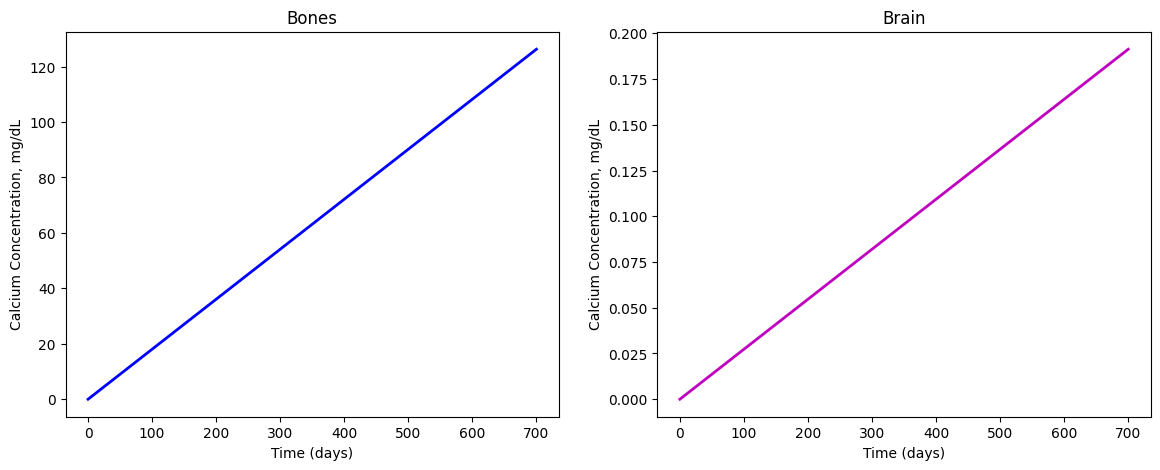

In [39]:
#this is healthy calcium concentration

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the model
def model(cy, t, cM1):
    cM2 = cM1 # assuming no active transport
    cM3 = 0
    cM4 = 0.21*(cM2) # change rate from 0.01 to f(y[3]/50) (BLL/50)
    cM6 = 0.99*(cM2 - cM4) # assuming 90% of the lead in the blood entering bone accumulates in the bone
    cM5 = 0.01*(cM2 - cM4)
    cM7 = 0 #
    cM8 = 0.15*cM5

    dydt = [cM2, cM3, cM4, cM5, cM6, cM7, cM8]
    return dydt

# Initial conditions
cM1 = 700  # intake of calcium (in ug/day)
cM20, cM30, cM40, cM50, cM60, cM70, cM80 = 0, 0, 0, 0, 0, 0, 0
cy0 = [cM20, cM30, cM40, cM50, cM60, cM70, cM80]

# Time conditions
t = np.linspace(0, 700, 700)  # Define the time points for integration

# Solving the ODEs
cy = odeint(model, cy0, t, args = (M1, ))

# Plotting results
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(t, cy[:, 4]/50, 'b-', linewidth=2, label='Calcium Concentratino, mg/dL')
axs[0].set_title('Bones')
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('Calcium Concentration, mg/dL')

axs[1].plot(t, cy[:, -1]/50, 'm-', linewidth=2)
axs[1].set_title('Brain')
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Calcium Concentration, mg/dL')
plt.savefig('calcium_model_figure.png')
plt.show()

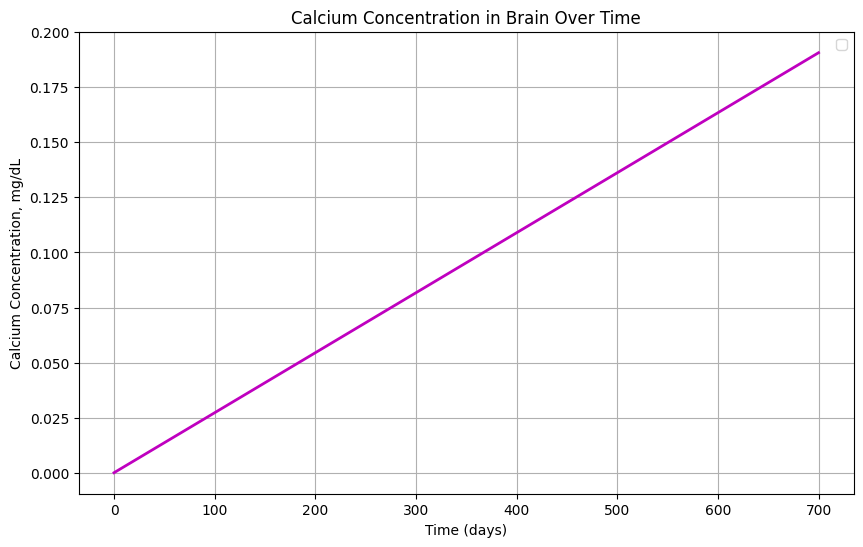

<Figure size 640x480 with 0 Axes>

In [40]:
#this plot shows how lead affects calcium concentration in bones
#spoiler: doesn't change much
bone_calcium_with_lead = ((cy[:, -1])*1000 - y[:, -1])/50
# print(bone_calcium_with_lead)

plt.figure(figsize=(10, 6))
plt.plot(t, bone_calcium_with_lead/1000, 'm-', linewidth=2)
plt.title('Calcium Concentration in Brain Over Time')
plt.xlabel('Time (days)')
plt.ylabel('Calcium Concentration, mg/dL')
plt.legend(loc='best')
plt.grid(True)
plt.show()
plt.savefig('calcium_model_figure_lead_effect.png')


## BDNF (Brain-Derived Neurotropic Factor) concentrations in brain

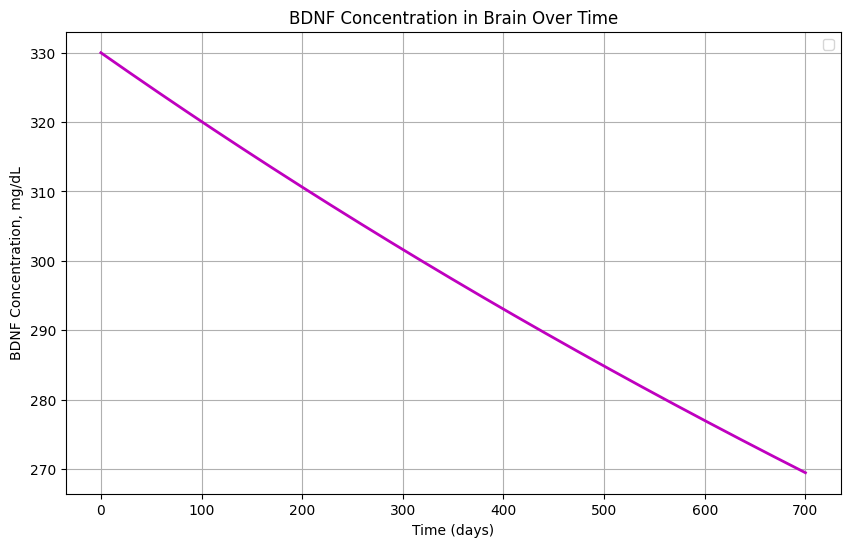

<Figure size 640x480 with 0 Axes>

In [41]:
# BDNF decreases bt 35%

# b_M1 = 69375 #picograms/dL , concentration in brain

#new excretion rate
#change rate to 0.01*np.exp(-0.02*(y[3]/50)) (BLL/50)
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def model(y, t, M1):
    BM2 = 0.6*(1-(y[3]/50)/1300)*M1
    BM3 = M1 - BM2
    BM4 = 0.01*np.exp(-0.02*(y[3]/50))*(BM2+y[3]) # change rate to 0.01*np.exp(-0.02*(y[3]/50)) (BLL/50)
    BM6 = 0.90*(BM2 - BM4)
    BM5 = 0.05*(BM2 - BM4)
    BM7 = 0.05*(BM2 - BM4)
    BM8 = 0.15*BM5
    BM9 = -99*BM8

    dydt = [BM2, BM3, BM4, BM5, BM6, BM7, BM8, BM9]
    return dydt

# Initial conditions
M1 = 11.53  # intake of lead (in ug/day)
M20, M30, M40, M50, M60, M70, M80, M90 = 0, 0, 0, 0, 0, 0, 0, 0
y0 = [M20, M30, M40, M50, M60, M70, M80, M90]

# Time conditions
t = np.linspace(0, 700, 700)  # Define the time points for integration

# Solving the ODEs
y = odeint(model, y0, t, args = (M1, ))


plt.figure(figsize=(10, 6))
plt.plot(t, y[:, 7]/50 + 330, 'm-', linewidth=2)
plt.title('BDNF Concentration in Brain Over Time')
plt.xlabel('Time (days)')
plt.ylabel('BDNF Concentration, mg/dL')
plt.legend(loc='best')
plt.grid(True)
plt.show()
plt.savefig('BDNF_model_figure.png')



